# Dynamic Programming

Read [Here](https://github.com/vg11072001/Python-programming/tree/main/DSA%20Python#dynamic-programming)

In [ ]:
import typing 
import collections
import heapq
from typing import List
from collections import defaultdict, Counter
from  functools import cmp_to_key

In [ ]:
class Solution:
    def climbStairs(self, n: int) -> int:
        '''
        Standard DP problem approach:
        drawn decision tree using a brute force approach 
        then tried to store it in the cache dictionary and 
        finally optimized by taking 2 pointer or 2-length array and storing the first 2 elements on it m
            moving forward on array of length n. Important for intitail 2 points wrote the base case!  
        '''
        if n<=3:
            return n
        i=3
        dp = [1,2]
        while i<=n:
            temp = dp[1]
            dp[1] = dp[0]+dp[1]
            dp[0] = temp
            i+=1
        return dp[1]

In [ ]:
class Solution:
    def climbStairs(self, n: int) -> int:
        one = 1
        two = 1
        
        for i in range(n-1):
            temp = one
            one = one + two
            two = temp
        return one

In [ ]:
class Solution:
    def minCostClimbingStairs(self, cost: List[int]) -> int:
        '''
        concept is to build the solution from the base cases by breaking down the problem into smaller subproblems. 
        At each step, the minimum cost to reach that step is either from the previous step or the one before it. 
        By using only the last two computed values (dp0, dp1), we avoid recalculating subproblems, 
        '''
        if not cost:
            return 0
        
        cur=0
        dp0=cost[0]
        
        if len(cost) >= 2:
            dp1=cost[1]
        
        for i in range(2, len(cost)):
            cur=cost[i] + min(dp0,dp1)
            dp0=dp1
            dp1=cur
            
        return min(dp0,dp1)


In [ ]:
class Solution:
    def minCostClimbingStairs(self, cost: List[int]) -> int:
        '''    
        
        DP but works by modifying the input list directly
        logic is based on starting from the `second-to-last step` and updating each step's cost to be the current step cost plus 
            the minimum cost of the next one or two steps ahead.
            
        
        Appends a [0] to the cost list, representing reaching the top with no cost. 
        Then, for each step from the end back to the beginning, the cost at each step is updated 
            to include the minimum cost of the next two steps (cost[i+1] and cost[i+2])
        '''
        cost.append(0)

        for i in range(len(cost)-3,-1,-1):
            cost[i]+= min(cost[i+1], cost[i+2])
        return min(cost[0], cost[1])

In [ ]:
class Solution:
    def rob(self, nums: List[int]) -> int:
        n = len(nums)
        
        if n == 1:
            return nums[0]
        
        dp = [0] * n
        
        dp[0] = nums[0]
        dp[1] = max(nums[0], nums[1])
        
        for i in range(2, n):
            dp[i] = max(dp[i-1], nums[i] + dp[i-2])
        
        return dp[-1] 

In [ ]:
class Solution:
    def rob(self, nums: List[int]) -> int:
        
        '''
        1. check the brute force way 
        2. logic build for sub prblm
        >>  # rob = max(arr[0] + arr[2:n], arr[1:n])
        
        
        
        '''

        rob1, rob2 = 0, 0
        # rob1, rob2, n, n+1, .......
        for n in nums:
            temp = max(n + rob1, rob2)
            rob1 = rob2
            rob2 = temp
        return rob2

In [ ]:

class Solution:
    def rob(self, nums: List[int]) -> int:
        
        '''
        for circle formation of adjacent houses approach- 
        runn the house robber function on subarrays after:
            1. excluding last element
            2. excluding first element     
            3. for edge case first element
            
        '''
        
        return max(nums[0], self.helper(nums[1:]), self.helper(nums[:-1]))


    def helper(self, nums):
        rob1 = 0
        rob2 = 0
        for n in nums:
            newrob = max(rob1+n, rob2)
            rob1 = rob2
            rob2 = newrob
        return rob2





In [ ]:
class Solution:
    def longestPalindrome(self, s: str) -> str:
        
        '''
        Approach to check the palindrom we started by selecting one charac and expanding the length 
        taken the approch with even and odd lenght, 
        wrote edge case conditions for both ,
        then for each case check the windown len with previous stored in reslen and updated res accodingly
        
        TC: O(n^2)
        '''
        
        res = ''
        reslen = 0

        for i in range(len(s)):

            #odd length
            l, r = i, i
            while l>=0 and r <len(s) and s[l]==s[r]:
                # if window we have contain maximum length then store it
                if r-l+1>reslen:
                    reslen = r-l+1
                    res = s[l:r+1]
                l -=1
                r +=1


            #even length
            l, r = i, i+1
            while l>=0 and r <len(s) and s[l]==s[r]:
                # if window we have contain maximum length then store it
                if r-l+1>reslen:
                    reslen = r-l+1
                    res = s[l:r+1]
                l -=1
                r +=1

        return res

In [ ]:
class Solution:
    def longestPalindrome(self, s: str) -> str:
        
        '''
        DP Solution
        
        TC: O(n^2)
        '''
        n = len(s)
        dp = [[False] * n for _ in range(n)]
        ans = [0, 0]

        for i in range(n):
            dp[i][i] = True

        for i in range(n - 1):
            if s[i] == s[i + 1]:
                dp[i][i + 1] = True
                ans = [i, i + 1]

        for diff in range(2, n):
            for i in range(n - diff):
                j = i + diff
                if s[i] == s[j] and dp[i + 1][j - 1]:
                    dp[i][j] = True
                    ans = [i, j]

        i, j = ans
        return s[i : j + 1]

In [ ]:
class Solution:
    def longestPalindrome(self, s: str) -> str:
        
        '''
        Manacher's Algorithm

        
        TC: O(n)
        '''
        s_prime = "#" + "#".join(s) + "#"
        n = len(s_prime)
        palindrome_radii = [0] * n
        center = radius = 0

        for i in range(n):
            mirror = 2 * center - i

            if i < radius:
                palindrome_radii[i] = min(radius - i, palindrome_radii[mirror])

            while (
                i + 1 + palindrome_radii[i] < n
                and i - 1 - palindrome_radii[i] >= 0
                and s_prime[i + 1 + palindrome_radii[i]]
                == s_prime[i - 1 - palindrome_radii[i]]
            ):
                palindrome_radii[i] += 1

            if i + palindrome_radii[i] > radius:
                center = i
                radius = i + palindrome_radii[i]

        max_length = max(palindrome_radii)
        center_index = palindrome_radii.index(max_length)
        start_index = (center_index - max_length) // 2
        longest_palindrome = s[start_index : start_index + max_length]

        return longest_palindrome

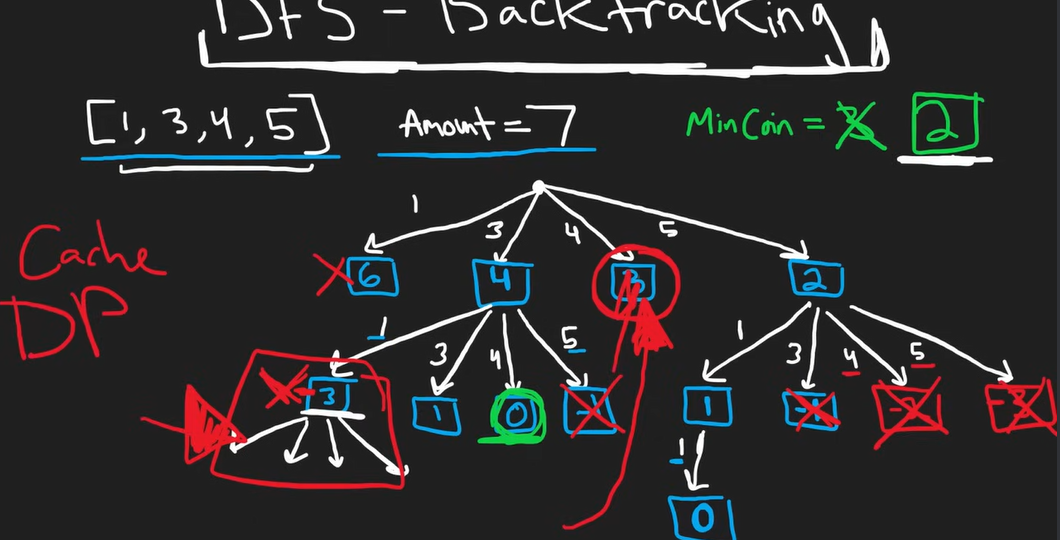

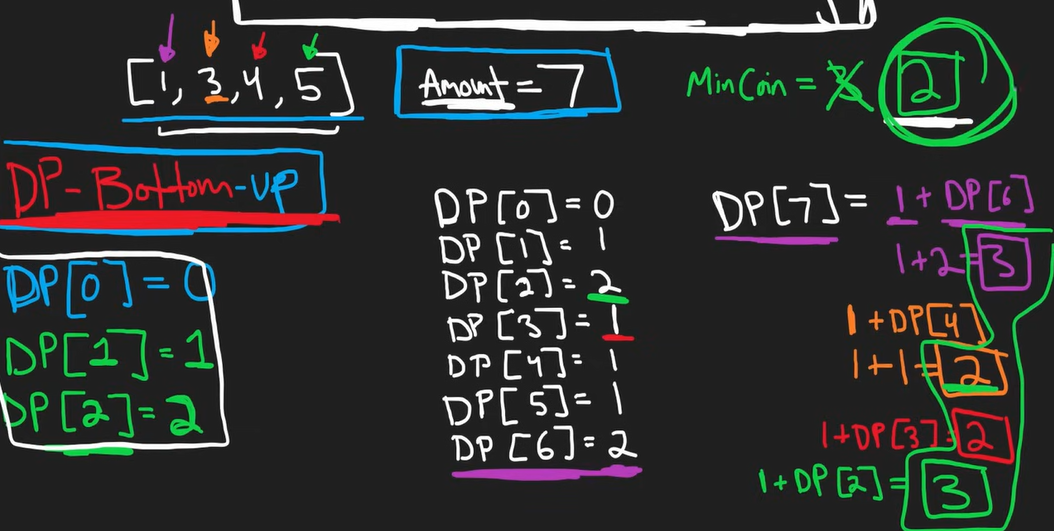
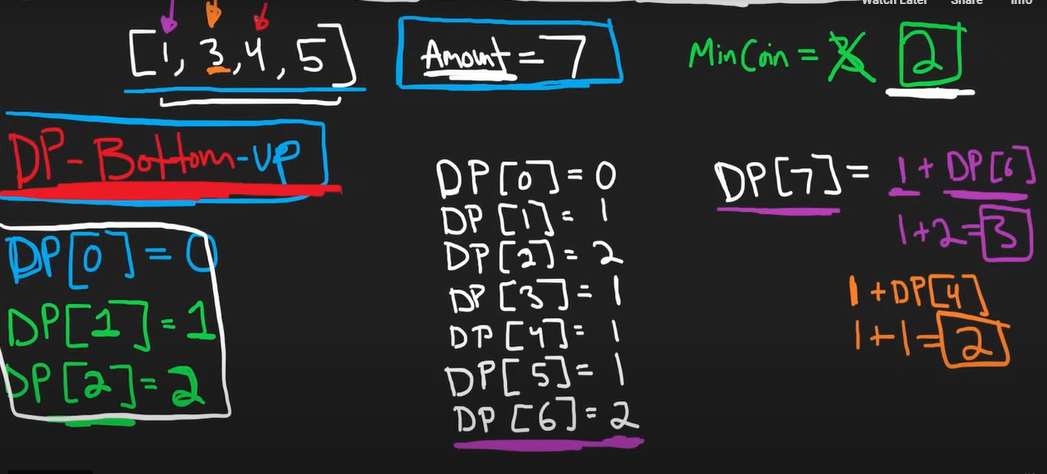

In [ ]:
class Solution:
     def coinChange(self, coins: List[int], amount: int) -> int:
        '''

        
        # TC O(amount * len(coin))
        # SC O(amount)
        
        
        '''
        dp = [amount + 1] * (amount + 1)
        dp[0] = 0

        for a in range(1, amount + 1):
            for c in coins:
                if a - c >= 0:
                    dp[a] = min(dp[a], 1 + dp[a - c])
        return dp[amount] if dp[amount] != amount + 1 else -1

In [ ]:
class Solution:
    def min_ignore_none(self, a, b):
        if a is None:
            return b
        if b is None:
            return a
        return min(a, b)

    def coinChange(self, coins: List[int], amount: int) -> int:
        '''
        Approach : Dynamic Programming DFS
        
        '''
        if amount == 0:
            return 0  # Base case: if amount is 0, no coins are needed
        if not coins:
            return -1  # Base case: if there are no coins, the amount cannot be achieved

        # Create a memoization table to store results
        dp = [None] * (amount + 1)
        dp[0] = 0  # Base case: 0 coins are needed to make 0

        for coin in coins:
            for i in range(coin, amount + 1):
                if dp[i - coin] is not None:
                    dp[i] = self.min_ignore_none(dp[i], dp[i - coin] + 1)

        return dp[amount] if dp[amount] is not None else -1

In [ ]:
class Solution:
    def maxProduct(self, nums: List[int]) -> int:
        '''
        a dynamic programming approach where it keeps track of the current minimum (curMin) and current maximum (curMax) subarray products.
        Sliding Window-like: continuously evaluates subarrays as it iterates through the input list, considering all possible contiguous subarrays up to the current element by updating the curMax and curMin.

        3 cases:
        if all positive then product will increase
        if all negative then product will be alternative negative or positve
            - creating min and max value variable
            - storing by comparing products : n * curMax, n * curMin, n

        if value is zero then reset the middway product value to 1        
        '''

        # O(n)/O(1) : Time/Memory
        res = nums[0]  # not consider the zero boz of case like nums = [-1]
        curMin, curMax = 1, 1

        for n in nums:

            tmp = curMax * n
            curMax = max(n * curMax, n * curMin, n)
            curMin = min(tmp, n * curMin, n)
            res = max(res, curMax)
        return res

In [ ]:
class Solution:
    def maxProduct(self, nums: List[int]) -> int:
        '''
        Kadane's Algorithm
        
        '''
        maxi = float('-inf')
        prod = 1
        
        # Forward pass
        for i in range(len(nums)):
            prod *= nums[i]
            maxi = max(prod, maxi)
            if prod == 0:
                prod = 1
        
        prod = 1
        # Backward pass
        for i in range(len(nums) - 1, -1, -1):
            prod *= nums[i]
            maxi = max(prod, maxi)
            if prod == 0:
                prod = 1
        
        return maxi

    def maxProduct(self, nums: List[int]) -> int:
        '''
        second way of writing Prefix and postfix
        
        By traversing in both directions – O(n) Time and O(1) Space
        '''
        n = len(nums)
        maxProd = float('-inf')
    
        # leftToRight to store product from left to Right
        leftToRight = 1
    
        # rightToLeft to store product from right to left
        rightToLeft = 1
    
        for i in range(n):
            if leftToRight == 0:
                leftToRight = 1
            if rightToLeft == 0:
                rightToLeft = 1

            # calculate product from index left to right
            leftToRight *= nums[i]

            # calculate product from index right to left
            j = n - i - 1
            rightToLeft *= nums[j]
            maxProd = max(leftToRight, rightToLeft, maxProd)

        return maxProd

In [ ]:
'''
Brute Force-DFS recursion - 2^n bcoz of choice to make on each nums value
'''

def lis_end_at_i(arr, i):
    # Base case
    if i == 0:
        return 1

    # Consider all elements on the left of i,
    # recursively compute LISs ending with 
    # them and consider the largest
    mx = 1
    for prev in range(i):
        if arr[prev] < arr[i]:
            mx = max(mx, lis_end_at_i(arr, prev) + 1)
    return mx

def lengthOfLIS(arr):
    n = len(arr)
    res = 1
    for i in range(1, n):
        res = max(res, lis_end_at_i(arr, i))
    return res


# Driver program to test the above function
arr = [10, 22, 9, 33, 21, 50, 41, 60]
print("Length of lis is", lengthOfLIS(arr))

In [ ]:
'''
Memoization - o(n^2)
'''

def lis_end_at_i(arr, i, dp):
  
    # Base case
    if i == 0:
        return 1

    # Check if the result is already computed
    if dp[i] != -1:
        return dp[i]

    # Consider all elements on the left of i,
    # recursively compute LISs ending with 
    # them and consider the largest
    mx = 1
    for prev in range(i):
        if arr[prev] < arr[i]:
            mx = max(mx, lis_end_at_i(arr, prev, dp) + 1)

    # Store the result in the dp array
    dp[i] = mx
    return dp[i]

def lis(arr):
    n = len(arr)
    dp = [-1] * n  # Initialize memo array with -1
    res = 1
    for i in range(1, n):
        res = max(res, lis_end_at_i(arr, i, dp))
    return res

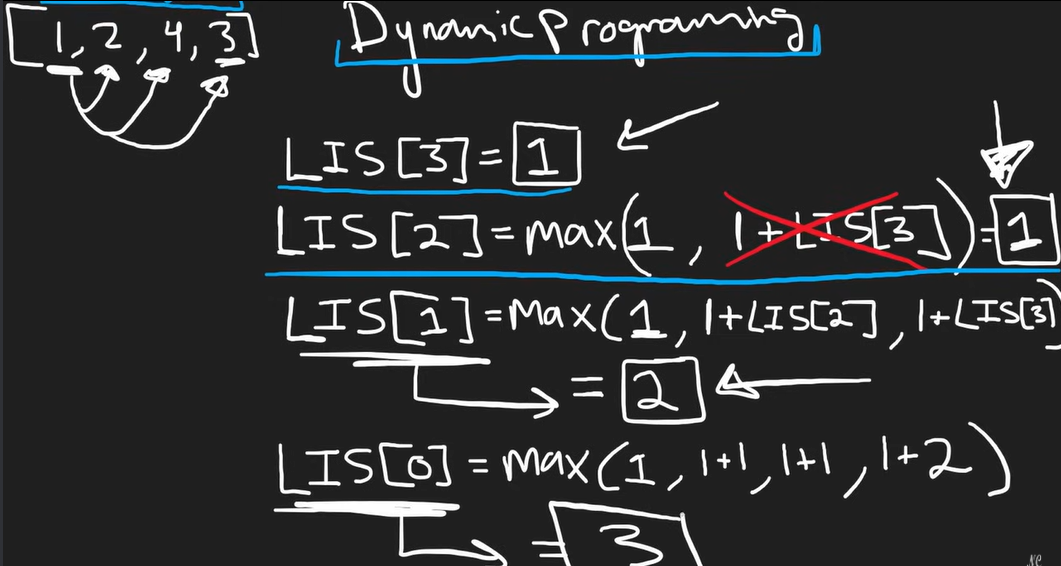

In [ ]:
'''
Dynamic programming Python implementation
of LIS problem

lis returns length of the longest
increasing subsequence in arr of size n
O(n^2)
'''
class Solution:
    def lengthOfLIS(self, nums: List[int]) -> int:
        '''
        TC: O(n^2)
        '''
        LIS = [1] * len(nums)  # cache the result

        for i in range(len(nums) - 1, -1, -1):   # its in decresing order
            for j in range(i + 1, len(nums)): 
                if nums[i] < nums[j]: # made sure its in increasing order
                    LIS[i] = max(LIS[i], 1 + LIS[j]) # (   LIS starting at j (increasing order of i))
        return max(LIS)

In [1]:
'''
# Binary search approach + Greedy - O(nlogn)

'''

def lengthOfLIS(nums):
    n = len(nums)
    ans = []

    # Initialize the answer list with the
    # first element of nums
    ans.append(nums[0])

    for i in range(1, n):
        if nums[i] > ans[-1]:
            # If the current number is greater than the last element of the answer list, 
            # it means we have found a longer increasing subsequence. 
            # Hence, we append the current number to the answer list.
            ans.append(nums[i])
        else:
            # If the current number is not greater than the last element of the answer list, 
            # we perform a binary search to find the smallest element in the answer list that
            # is greater than or equal to the current number.
            low = 0
            high = len(ans) - 1
            while low < high:
                mid = low + (high - low) // 2
                if ans[mid] < nums[i]:  # shouldnt approach with oppsite condition ans[mid]> nums[i] and r = mid else low =mid+1  
                    # this will fail results bcox of increasing condition and greedy
                    low = mid + 1
                else:
                    high = mid
                    
            # We update the element at the found position with the current number.
            # By doing this, we are maintaining a sorted order in the answer list.
            ans[low] = nums[i]

    # The length of the answer list represents the length of the longest increasing subsequence.
    return len(ans)

# Driver program to test above function
if __name__ == "__main__":
    nums = [4,10,4,3,8,9]
    # Function call
    print("Length of LIS is", lengthOfLIS(nums))


Length of LIS is 3


In [ ]:
'''
Without DP solutions kinda 2 sum logic
'''

class Solution:
    def canPartition(self, nums: List[int]) -> bool:

        total = sum(nums)
        if total % 2 != 0:
            return False

        possiblesums = set()
        target = total / 2

        for i in range(len(nums)):
            if nums[i] == target:
                return True
            # Store all the unique possible sums that are now possible with our nums[i]
            newsums = set([nums[i]])
            for s in possiblesums:
                if s+nums[i] == target:
                    return True
                if s+nums[i] < target:
                    newsums.add(s+nums[i])
            possiblesums = possiblesums.union(newsums)

        return False

In [ ]:
'''
Using True or False in DP
''' 

class Solution:
    def canPartition(self, nums: List[int]) -> bool:
        s = sum(nums)
        if s&1:
            return False
        """
        The dp array stores the total obtained sums we have come across so far.
        Notice that dp[0] = True; if we never select any element, the total sum is 0.
        """
        dp = [True]+[False]*s
        # Now, loop through each element
        for num in nums:
            for curr in range(s, num-1, -1):  # avoid going out-of-bounds
                """
                Case 1: The current sum (curr) has been seen before.
                        Then, if we don't select the current element, the sum will not change.
						So, this total sum will still exist, and its dp value remains True.
				
				Case 2: The current sum (curr) has not been seen before,
				        but it can be obtained by selecting the current element.
						This means that dp[curr-num] = True, and thus dp[curr] now becomes True.
				
				Case 3: The current sum (curr) has not been seen before,
				        and it cannot be obtained by selecting the current element.
						So, this total sum will still not exist, and its dp value remains False.
                """
                dp[curr] = dp[curr] or dp[curr-num]
        # Finally, we want to obtain the target sum
        return dp[s//2]  # or dp[s>>1]

In [ ]:
'''
Using Top Down Memoization
'''

class Solution:
    def canPartition(self, nums: List[int]) -> bool:
        def rec(i,rsum ):
            if(rsum==0): return True
            if(i==len(nums) or rsum < 0): return False 
            elif(self.dp[i][rsum] != -1 ):
                return self.dp[i][rsum]
            self.dp[i][rsum]= rec(i+1,rsum-nums[i]) or rec(i+1,rsum)
            return self.dp[i][rsum]
        
        
        totalsum = sum(nums)
        if(totalsum%2): return False 
        else: 
            self.dp = [ [-1]*((totalsum//2)+1) for _ in range(len(nums))]
            return rec(0,totalsum//2)

In [ ]:
'''
Using Neetcode- DP Approach
'''


class Solution:
    def canPartition(self, nums: List[int]) -> bool:
        if sum(nums) % 2:
            return False

        dp = set()
        dp.add(0)
        target = sum(nums) // 2

        for i in range(len(nums) - 1, -1, -1):
            nextDP = set()
            for t in dp:
                if (t + nums[i]) == target:
                    return True
                nextDP.add(t + nums[i])
                nextDP.add(t)
            dp = nextDP
        return False

[Read GFG 2D solution](https://www.geeksforgeeks.org/partition-problem-dp-18/#using-memoization)